Q1. The mathematical formula for a linear SVM is:


f(x) = sign(w^T x + b)

where f(x) is the predicted class label, x is the input vector, w is the weight vector, b is the bias term, and sign() is the sign function.

Q2. The objective function of a linear SVM is to find the hyperplane that maximally separates the classes. Mathematically, it can be expressed as:

minimize: (1/2) * ||w||^2
subject to: y_i * (w^T x_i + b) >= 1 for all training samples (x_i, y_i)

Here, w and b are the parameters of the hyperplane, x_i represents the training samples, and y_i is the corresponding class label (+1 or -1).

Q3. The kernel trick is a technique used in SVM to implicitly map the input data into a higher-dimensional feature space without actually calculating the coordinates of the data in that space. This is done by using a kernel function that computes the inner products between the transformed feature vectors. It allows SVM to learn non-linear decision boundaries by leveraging the properties of the kernel function, such as the radial basis function (RBF) kernel.

Q4. Support vectors are the data points from the training set that lie closest to the decision boundary or margin of the SVM. These points play a crucial role in defining the decision boundary and determining the classification of new instances. Support vectors are responsible for supporting the decision boundary and are used to make predictions for new data points.

For example, consider a binary classification problem with two classes, labeled +1 and -1. The support vectors are the data points from each class that are closest to the decision boundary. These support vectors influence the position and orientation of the decision boundary, and any new data point will be classified based on its position relative to these support vectors.

Q5. Here are the explanations of Hyperplane, Marginal plane, Soft margin, and Hard margin in SVM:

Hyperplane: In SVM, the hyperplane represents the decision boundary that separates the data points of different classes. For a binary classification problem, the hyperplane is a line (in 2D) or a plane (in 3D) that maximally separates the classes. It is defined by the weights and biases in the linear SVM formula.

Marginal plane: The marginal plane refers to the parallel planes that are constructed on each side of the hyperplane and just touch the support vectors. These planes are equidistant from the hyperplane and play a significant role in defining the margin of the SVM.

Soft margin: In SVM, a soft margin allows for some misclassifications or violations of the margin constraints. It allows the SVM to tolerate certain errors in the training data and find a more flexible decision boundary. The soft margin SVM is suitable when dealing with overlapping or noisy data.

Hard margin: In contrast, a hard margin SVM enforces strict adherence to the margin constraints, requiring all training samples to be correctly classified and lying outside the margin. This type of SVM is more prone to overfitting and is suitable when the data is well-separated and noise-free.



Accuracy: 0.9


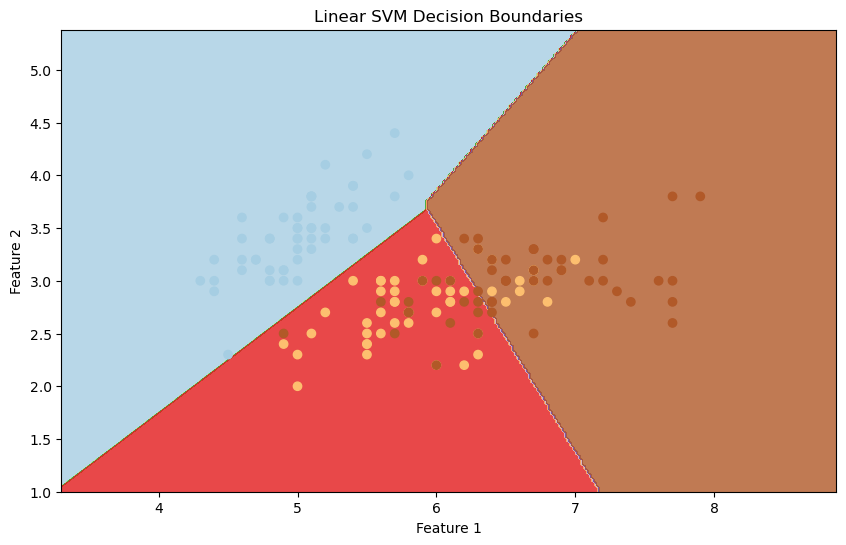

C = 0.1 Accuracy: 0.8333333333333334
C = 1 Accuracy: 0.9
C = 10 Accuracy: 0.9


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Using only two features for visualization purposes
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear SVM classifier
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Predict labels for the testing set
y_pred = svm.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot the decision boundaries
# Create a meshgrid of feature values
h = 0.02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain predictions for each point in the meshgrid
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the meshgrid and the data points
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Linear SVM Decision Boundaries')
plt.show()

# Try different values of regularization parameter C
C_values = [0.1, 1, 10]

for C in C_values:
    svm = SVC(kernel='linear', C=C)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("C =", C, "Accuracy:", accuracy)
